### Importing modules

In [104]:
import pandas as pd
import numpy as np
import sklearn

### Loading CSV

In [105]:
heartDiseaseData = pd.read_csv("heart disease classification dataset.csv")
heartDiseaseData.shape

(303, 15)

In [106]:
heartDiseaseData.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


### Dropping "Unnamed: 0 column"

In [107]:
heartDiseaseData = heartDiseaseData.drop("Unnamed: 0", axis=1)

In [108]:
heartDiseaseData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


### Inspecting missing(NaN) values

In [109]:
heartDiseaseData.isnull().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### SimpleImputer Import and setting its strategy to mean

In [110]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy="mean")

### Imputing 'trestbps' missing values

In [111]:
impute.fit(heartDiseaseData[['trestbps']])
heartDiseaseData['trestbps'] = impute.transform(heartDiseaseData[['trestbps']])

### Imputing 'chol' missing values

In [112]:
impute.fit(heartDiseaseData[['chol']])
heartDiseaseData['chol'] = impute.transform(heartDiseaseData[['chol']])

### Imputing 'thalach' missing values

In [113]:
impute.fit(heartDiseaseData[['thalach']])
heartDiseaseData['thalach'] = impute.transform(heartDiseaseData[['thalach']])

In [114]:
heartDiseaseData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [115]:
heartDiseaseData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,yes


### Encoding

In [116]:
heartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [117]:
heartDiseaseData['sex'].unique()

array(['male', 'female'], dtype=object)

In [118]:
heartDiseaseData['target'].unique()

array(['yes', 'no'], dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [120]:
heartDiseaseData['sex'] = enc.fit_transform(heartDiseaseData['sex'])
heartDiseaseData['target'] = enc.fit_transform(heartDiseaseData['target'])

### Scaling between 0-1 && Feature and Label selection

In [121]:
x = heartDiseaseData.drop(columns='target', axis=1)
y = heartDiseaseData['target']

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [124]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [125]:
x_test_scaled = scaler.transform(x_test)

### Logisitic Regression

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [127]:
logRegress=LogisticRegression(max_iter=1000) ##max_iter to avoid warning
logRegress.fit(x_train,y_train)
y_predict_lg=logRegress.predict(x_test)

In [128]:
print(y_predict_lg)

[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0]


In [129]:
lg_accuracy_percent = accuracy_score(y_test, y_predict_lg)*100

In [130]:
print(lg_accuracy_percent)

72.1311475409836


### Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtc.fit(x_train,y_train)
y_predict_dtc = dtc.predict(x_test)

In [133]:
dtc_accuracy_percent = accuracy_score(y_predict_dtc,y_test)*100

In [134]:
print(dtc_accuracy_percent)

67.21311475409836


### Accuracy barchart

Text(0.5, 1.0, 'Models Accuracy Graph')

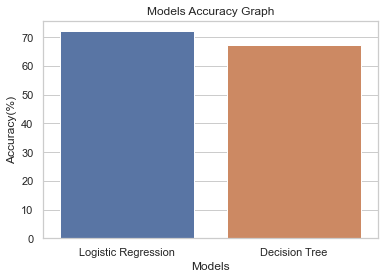

In [141]:
sns.set_theme(style="whitegrid")
barplotData = pd.DataFrame.from_dict({'cols': ['Logistic Regression', 'Decision Tree'], 'values': [lg_accuracy_percent, dtc_accuracy_percent]})
barChart = sns.barplot(x = 'cols', y = 'values', data = barplotData)
plt.xlabel("Models")
plt.ylabel("Accuracy(%)")
plt.title("Models Accuracy Graph")